# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [334]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/validation_cohort'

Import Data

In [335]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/Expansion/datasets/adni/metadata/cleaned_information/baseline_atrophy_scores.csv'
sheet = None

In [336]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,Unnamed__0,subid,CSF_Cerebellum_Z_S0_Unth,CSF_Cortex_Z_S0_Unth,CSF_Subcortex_Z_S0_Unth,CSF_Temporal_Z_S0_Unth,CSF_Brain_Z_S0_Unth,CSF_MTL_Z_S0_Unth,CSF_Occ_Z_S0_Unth,CSF_Frontal_Z_S0_Unth,...,Parietal_GCAS,Occipital_GCAS,Temporal_GCAS,Cerebellum_GCAS,Ventricle_GCAS,MTL_Schelten,Diagnosis,Sex,Age,Discovery_Cohort
0,0,002_S_0295,-26319.38152,-94610.56336,373.297842,-29230.998150,-126196.37900,-746.688684,-24081.964640,-32607.592110,...,1.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
1,1,002_S_0413,-13670.88871,-35159.50877,5009.504947,-12610.279560,-51167.77116,-449.838607,-8185.340726,-13903.977170,...,0.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
2,2,002_S_0559,-38702.13792,-113330.91930,152.392985,-28088.509090,-158945.89180,-754.706246,-25738.506400,-34449.367040,...,2.0,0.0,1.0,0.0,1.0,2.0,Normal,NaN,NaN,0.0
3,3,002_S_0619,-35472.21632,-244383.29780,-23876.106190,-64261.968320,-340171.10470,-1947.061673,-51088.102680,-81475.108430,...,NaN,NaN,NaN,NaN,NaN,NaN,Alzheimer,NaN,NaN,0.0
4,4,002_S_0685,-31092.93296,-113126.04530,-22643.911490,-28367.111020,-175181.51670,-1014.786011,-32806.816640,-18280.083970,...,1.0,0.0,1.0,1.0,2.0,3.0,Normal,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1309,941_S_4365,-38529.96216,-176408.58410,-15404.929680,-44538.891450,-248248.60770,-662.636580,-45763.001790,-51966.135180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,1310,941_S_4376,-17949.11453,-79558.61699,-104.528538,-19326.400360,-99992.23516,-236.251734,-30861.230910,-12256.220060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,1311,941_S_4377,-15992.36193,-31598.14874,8601.241440,-6123.071105,-42015.99706,-63.774856,-17403.780770,-5480.603967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,1312,941_S_4420,-16826.37025,-106561.39320,-551.877244,-28505.754670,-132135.84720,-240.304833,-19856.342990,-43372.373360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [337]:
drop_list = ['MTL_Schelten']

In [338]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Unnamed__0,subid,CSF_Cerebellum_Z_S0_Unth,CSF_Cortex_Z_S0_Unth,CSF_Subcortex_Z_S0_Unth,CSF_Temporal_Z_S0_Unth,CSF_Brain_Z_S0_Unth,CSF_MTL_Z_S0_Unth,CSF_Occ_Z_S0_Unth,CSF_Frontal_Z_S0_Unth,...,Parietal_GCAS,Occipital_GCAS,Temporal_GCAS,Cerebellum_GCAS,Ventricle_GCAS,MTL_Schelten,Diagnosis,Sex,Age,Discovery_Cohort
0,0,002_S_0295,-26319.38152,-94610.56336,373.297842,-29230.998150,-126196.37900,-746.688684,-24081.964640,-32607.592110,...,1.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
1,1,002_S_0413,-13670.88871,-35159.50877,5009.504947,-12610.279560,-51167.77116,-449.838607,-8185.340726,-13903.977170,...,0.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
2,2,002_S_0559,-38702.13792,-113330.91930,152.392985,-28088.509090,-158945.89180,-754.706246,-25738.506400,-34449.367040,...,2.0,0.0,1.0,0.0,1.0,2.0,Normal,NaN,NaN,0.0
4,4,002_S_0685,-31092.93296,-113126.04530,-22643.911490,-28367.111020,-175181.51670,-1014.786011,-32806.816640,-18280.083970,...,1.0,0.0,1.0,1.0,2.0,3.0,Normal,NaN,NaN,0.0
5,5,002_S_0729,-14931.99589,-23315.73761,9351.074758,-14079.235240,-26515.22312,-392.045941,-16190.164180,6146.821509,...,1.0,0.0,0.0,0.0,0.0,2.0,MCI,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1193,136_S_4517,-10515.57764,-29144.98024,9041.423601,-6505.281967,-30775.86418,45.739682,-17547.895500,3034.972636,...,1.0,1.0,0.0,1.0,1.0,1.0,Normal,F,70.578082,1.0
766,1213,137_S_0722,-23193.08702,-100805.37620,-1135.602434,-22646.762440,-137231.13230,-393.496669,-21101.069200,-36725.405690,...,2.0,0.0,1.0,0.0,1.0,1.0,MCI,F,70.153425,1.0
767,1265,141_S_1152,-13628.75801,-50462.46484,-6510.956805,-19820.290950,-81338.67154,-679.958590,-20290.388240,-4794.264065,...,2.0,1.0,2.0,0.0,1.0,1.0,MCI,F,71.468493,1.0
768,1276,141_S_4438,-34443.03539,-143168.48540,-11248.728540,-41032.117950,-202178.94480,-1025.141055,-26386.237930,-50447.576740,...,1.0,0.0,2.0,1.0,2.0,3.0,MCI,F,76.923288,1.0


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [339]:
data_df.columns

Index(['Unnamed__0', 'subid', 'CSF_Cerebellum_Z_S0_Unth',
       'CSF_Cortex_Z_S0_Unth', 'CSF_Subcortex_Z_S0_Unth',
       'CSF_Temporal_Z_S0_Unth', 'CSF_Brain_Z_S0_Unth', 'CSF_MTL_Z_S0_Unth',
       'CSF_Occ_Z_S0_Unth', 'CSF_Frontal_Z_S0_Unth', 'CSF_Parietal_Z_S0_Unth',
       'CSF_Insular_Z_S0_Unth', 'CSF_Temp_Ins_Z_S6',
       'CSF_Cerebellum_Num_Voxels', 'CSF_Cortex_Num_Voxels',
       'CSF_Subcortex_num_voxels', 'CSF_Temporal_Num_Voxels',
       'CSF_Brain_Num_Voxels', 'CSF_MTL_Num_Voxels',
       'CSF_Occipital_num_voxels', 'CSF_Frontal_Num_voxels',
       'CSF_Parietal_Num_Voxels', 'CSF_Insular_Num_Voxels',
       'CSF_Total_Atrophy_Voxels', 'GM_Cerebellum_Z_S0_Unth',
       'GM_Cortex_Z_S0_Unth', 'GM_Subcortex_Z_S0_Unth',
       'GM_Temporal_Z_S0_Unth', 'GM_Brain_Z_S0_Unth', 'GM_MTL_Z_S0_Unth',
       'GM_Occ_Z_S0_Unth', 'GM_Frontal_Z_S0_Unth', 'GM_Parietal_Z_S0_Unth',
       'GM_Insular_Z_S0_Unth', 'GM_Temp_Insular_Z_S0_Unth',
       'GM_Cerebellum_Num_Voxels', 'GM_Cortex_Num_

Set the parameters for dropping rows

In [340]:
column = 'Discovery_Cohort'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
value = 1 # The value to drop if found

In [341]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Unnamed__0,subid,CSF_Cerebellum_Z_S0_Unth,CSF_Cortex_Z_S0_Unth,CSF_Subcortex_Z_S0_Unth,CSF_Temporal_Z_S0_Unth,CSF_Brain_Z_S0_Unth,CSF_MTL_Z_S0_Unth,CSF_Occ_Z_S0_Unth,CSF_Frontal_Z_S0_Unth,...,Parietal_GCAS,Occipital_GCAS,Temporal_GCAS,Cerebellum_GCAS,Ventricle_GCAS,MTL_Schelten,Diagnosis,Sex,Age,Discovery_Cohort
718,7,002_S_0816,-25421.113250,-55166.061470,5181.427094,-25162.336670,-79101.72703,-602.793112,-21580.675300,-6457.362689,...,1.0,1.0,1.0,0.0,1.0,3.0,Alzheimer,F,70.838356,1.0
719,26,002_S_4270,-9935.777020,-11012.022430,7367.389634,-3537.778288,-15472.60603,98.187832,-8652.081921,3367.575080,...,1.0,0.0,0.0,0.0,0.0,0.0,Normal,F,NaN,1.0
720,45,005_S_0223,-36508.497700,-85495.459230,92.758568,-27180.331180,-104808.56930,-1107.849872,-13379.373810,-29762.942290,...,0.0,0.0,1.0,0.0,0.0,2.0,Normal,F,78.090411,1.0
721,54,005_S_0929,-28275.840420,-170496.954800,-25648.060410,-45870.031920,-230739.22350,-1012.176405,-42260.667880,-46921.094040,...,2.0,1.0,2.0,0.0,1.0,4.0,Alzheimer,M,82.101370,1.0
722,55,005_S_0929,-28275.840420,-170496.954800,-25648.060410,-45870.031920,-230739.22350,-1012.176405,-42260.667880,-46921.094040,...,2.0,1.0,2.0,1.0,2.0,3.0,Normal,F,82.101370,1.0
723,70,006_S_4192,-24846.165220,-124288.686400,-12270.784020,-37646.091510,-172362.51050,-1214.008655,-19620.511770,-42707.797470,...,1.0,0.0,2.0,0.0,2.0,3.0,Normal,F,82.345205,1.0
724,83,007_S_0068,-18586.549340,-72530.699600,5293.323412,-21757.538350,-84800.58179,-372.249642,-15890.469040,-22380.637530,...,1.0,1.0,2.0,0.0,0.0,2.0,MCI,F,74.526027,1.0
725,85,007_S_0101,-25089.932840,-134060.483600,-5992.055223,-35636.816200,-177683.28290,-684.429983,-25506.744940,-50366.276050,...,1.0,0.0,2.0,0.0,2.0,2.0,MCI,F,73.665753,1.0
726,109,009_S_1199,-22526.696560,-75326.243430,2011.354041,-23962.885860,-103543.50120,-298.484732,-15716.125910,-24973.055150,...,1.0,0.0,1.0,0.0,0.0,2.0,MCI,F,58.427397,1.0
727,116,009_S_4530,-28548.952550,-119954.068000,-3683.432145,-35462.177080,-161221.72390,-1001.502744,-31415.052860,-35433.138110,...,2.0,1.0,1.0,1.0,2.0,3.0,Normal,F,75.986301,1.0


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [342]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [343]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [344]:
data_df.columns

Index(['Unnamed__0', 'subid', 'CSF_Cerebellum_Z_S0_Unth',
       'CSF_Cortex_Z_S0_Unth', 'CSF_Subcortex_Z_S0_Unth',
       'CSF_Temporal_Z_S0_Unth', 'CSF_Brain_Z_S0_Unth', 'CSF_MTL_Z_S0_Unth',
       'CSF_Occ_Z_S0_Unth', 'CSF_Frontal_Z_S0_Unth', 'CSF_Parietal_Z_S0_Unth',
       'CSF_Insular_Z_S0_Unth', 'CSF_Temp_Ins_Z_S6',
       'CSF_Cerebellum_Num_Voxels', 'CSF_Cortex_Num_Voxels',
       'CSF_Subcortex_num_voxels', 'CSF_Temporal_Num_Voxels',
       'CSF_Brain_Num_Voxels', 'CSF_MTL_Num_Voxels',
       'CSF_Occipital_num_voxels', 'CSF_Frontal_Num_voxels',
       'CSF_Parietal_Num_Voxels', 'CSF_Insular_Num_Voxels',
       'CSF_Total_Atrophy_Voxels', 'GM_Cerebellum_Z_S0_Unth',
       'GM_Cortex_Z_S0_Unth', 'GM_Subcortex_Z_S0_Unth',
       'GM_Temporal_Z_S0_Unth', 'GM_Brain_Z_S0_Unth', 'GM_MTL_Z_S0_Unth',
       'GM_Occ_Z_S0_Unth', 'GM_Frontal_Z_S0_Unth', 'GM_Parietal_Z_S0_Unth',
       'GM_Insular_Z_S0_Unth', 'GM_Temp_Insular_Z_S0_Unth',
       'GM_Cerebellum_Num_Voxels', 'GM_Cortex_Num_

In [345]:
formula = "Diagnosis ~ MTL_Schelten + Occipital_GCAS + Parietal_GCAS + Frontal_GCAS + Temporal_GCAS + Ventricle_GCAS"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [346]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,MTL_Schelten,Occipital_GCAS,Parietal_GCAS,Frontal_GCAS,Temporal_GCAS,Ventricle_GCAS
718,1.0,3.0,1.0,1.0,1.0,1.0,1.0
719,1.0,0.0,0.0,1.0,1.0,0.0,0.0
720,1.0,2.0,0.0,0.0,0.0,1.0,0.0
721,1.0,4.0,1.0,2.0,1.0,2.0,1.0
722,1.0,3.0,1.0,2.0,2.0,2.0,2.0
723,1.0,3.0,0.0,1.0,1.0,2.0,2.0
724,1.0,2.0,1.0,1.0,0.0,2.0,0.0
725,1.0,2.0,0.0,1.0,1.0,2.0,2.0
726,1.0,2.0,0.0,1.0,0.0,1.0,0.0
727,1.0,3.0,1.0,2.0,1.0,1.0,2.0


Check multicollinearity in design matrix

In [347]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,5.892474
1,MTL_Schelten,1.700889
2,Occipital_GCAS,1.180054
3,Parietal_GCAS,1.466564
4,Frontal_GCAS,1.652850
5,Temporal_GCAS,1.518002
6,Ventricle_GCAS,1.533419


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [348]:
outcome_matrix

,Diagnosis[Alzheimer],Diagnosis[MCI],Diagnosis[Normal]
718,1.0,0.0,0.0
719,0.0,0.0,1.0
720,0.0,0.0,1.0
721,1.0,0.0,0.0
722,0.0,0.0,1.0
723,0.0,0.0,1.0
724,0.0,1.0,0.0
725,0.0,1.0,0.0
726,0.0,1.0,0.0
727,0.0,0.0,1.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [349]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [350]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.924748
         Iterations 6
----INTERPRETATION KEY----
reference_category : Diagnosis[Alzheimer]
y=0 : Diagnosis[MCI]
y=1 : Diagnosis[Normal]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x1619e3820>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: MNLogit
===============================================================
Model:              MNLogit          Pseudo R-squared: 0.128   
Dependent Variable: y                AIC:              124.1738
Date:               2024-08-29 16:11 BIC:              151.4912
No. Observations:   52               Log-Likelihood:   -48.087 
Df Model:           12               LL-Null:          -55.141 
Df Residuals:       38               LLR p-value:      0.29391 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
---------------------------------------------------------------
     y = 0        Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
---------------------------------------------------------------
     Intercept    0.8444   1.0969  0.7698 0.4414 -1.3055 2.9943
  MTL_Schelten   -0.6562   0.4905 -1.3377 0.1810 -1.6176 0.3052
Occipital_GCAS   -0.7229   0.9110 -0.7935 0.4275 -2.5085 1.0627
 Parietal_GCAS    1.1626   0.8299  1.4009 0.1612 -0.4640 2.7892
  Frontal_GCAS   -0.2252   0.9385 -0.2400 0.8103 -2.0646 1.6141
 Temporal_GCAS   -0.4686   0.7431 -0.6306 0.5283 -1.9251 0.9879
Ventricle_GCAS    0.7475   0.6809  1.0978 0.2723 -0.5871 2.0820
---------------------------------------------------------------
     y = 1       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------
     Intercept   1.2407   1.0567  1.1741 0.2404 -0.8304  3.3119
  MTL_Schelten  -0.1073   0.4997 -0.2147 0.8300 -1.0866  0.8720
Occipital_GCAS  -0.6912   0.9813 -0.7044 0.4812 -2.6145  1.2321
 Parietal_GCAS   0.9177   0.8065  1.1379 0.2552 -0.6630  2.4984
  Frontal_GCAS   0.8674   0.9453  0.9176 0.3588 -0.9853  2.7200
 Temporal_GCAS  -1.5761   0.7707 -2.0450 0.0409 -3.0866 -0.0656
Ventricle_GCAS   0.0026   0.7452  0.0035 0.9972 -1.4579  1.4632
===============================================================

"""

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 11.0 observations for Diagnosis[Alzheimer]
There are 22.0 observations for Diagnosis[MCI]
There are 19.0 observations for Diagnosis[Normal]
Optimal Thresholds: 
 {0: 0.23343114989898273, 1: 0.45767844612933384, 2: 0.23486383237836722}


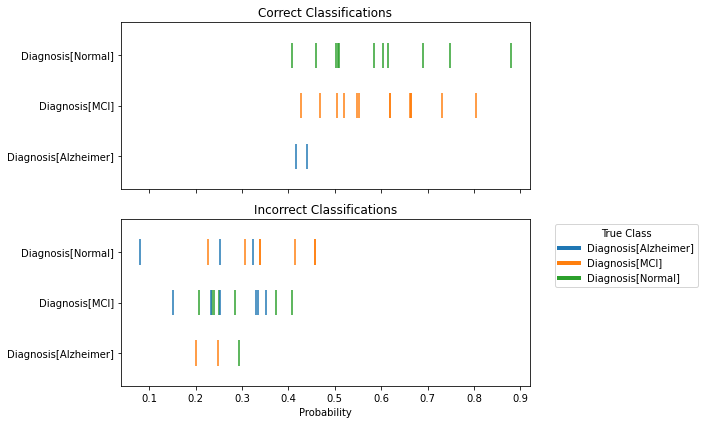

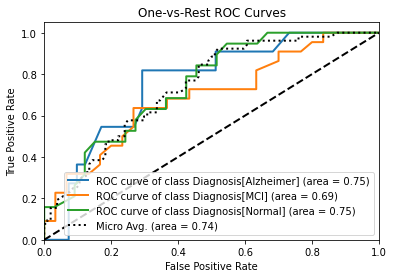

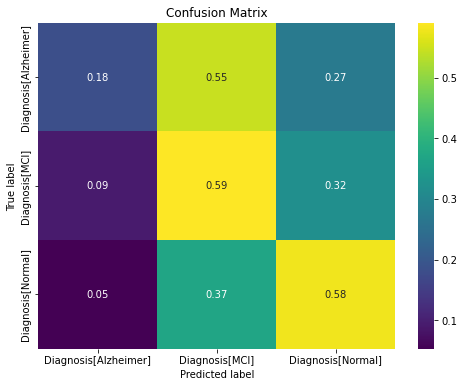

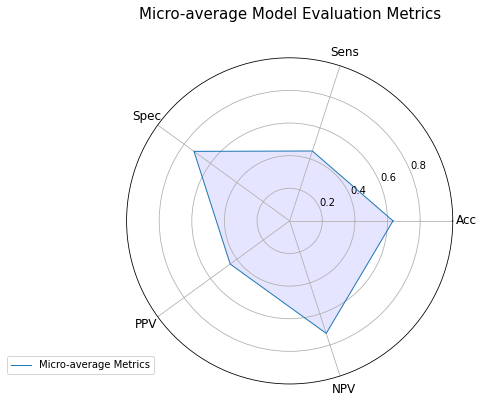

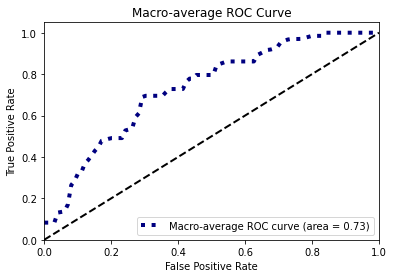

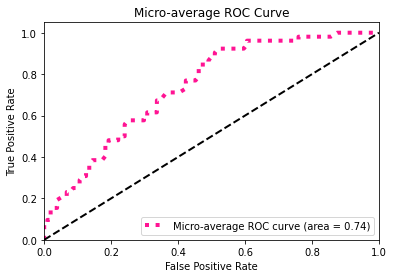

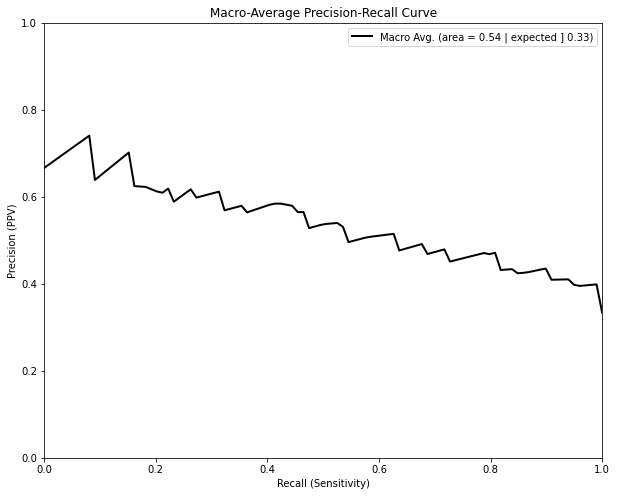

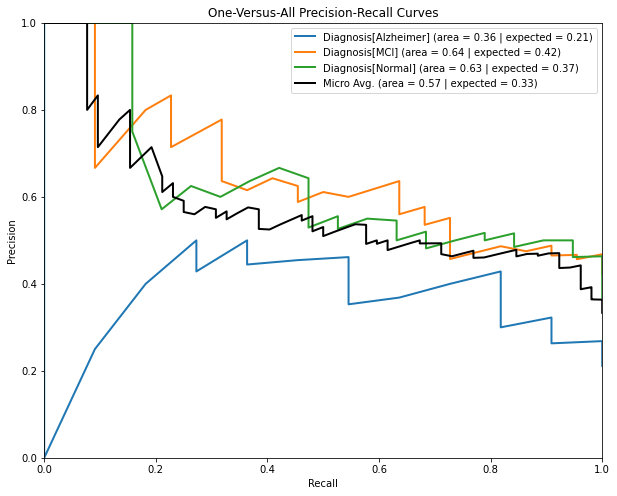

In [351]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir)
evaluator.run()

Bootstrap the Micro Average AUC

In [352]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

100%|██████████| 1000/1000 [00:08<00:00, 118.41it/s]

Mean AUC: 0.8297925975123778, 95% CI: (0.7380501109467457, 0.9241632766272189)


Permutation Test Two AUCs

In [353]:
data_df.columns

Index(['Unnamed__0', 'subid', 'CSF_Cerebellum_Z_S0_Unth',
       'CSF_Cortex_Z_S0_Unth', 'CSF_Subcortex_Z_S0_Unth',
       'CSF_Temporal_Z_S0_Unth', 'CSF_Brain_Z_S0_Unth', 'CSF_MTL_Z_S0_Unth',
       'CSF_Occ_Z_S0_Unth', 'CSF_Frontal_Z_S0_Unth', 'CSF_Parietal_Z_S0_Unth',
       'CSF_Insular_Z_S0_Unth', 'CSF_Temp_Ins_Z_S6',
       'CSF_Cerebellum_Num_Voxels', 'CSF_Cortex_Num_Voxels',
       'CSF_Subcortex_num_voxels', 'CSF_Temporal_Num_Voxels',
       'CSF_Brain_Num_Voxels', 'CSF_MTL_Num_Voxels',
       'CSF_Occipital_num_voxels', 'CSF_Frontal_Num_voxels',
       'CSF_Parietal_Num_Voxels', 'CSF_Insular_Num_Voxels',
       'CSF_Total_Atrophy_Voxels', 'GM_Cerebellum_Z_S0_Unth',
       'GM_Cortex_Z_S0_Unth', 'GM_Subcortex_Z_S0_Unth',
       'GM_Temporal_Z_S0_Unth', 'GM_Brain_Z_S0_Unth', 'GM_MTL_Z_S0_Unth',
       'GM_Occ_Z_S0_Unth', 'GM_Frontal_Z_S0_Unth', 'GM_Parietal_Z_S0_Unth',
       'GM_Insular_Z_S0_Unth', 'GM_Temp_Insular_Z_S0_Unth',
       'GM_Cerebellum_Num_Voxels', 'GM_Cortex_Num_

In [354]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [355]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

 13%|█▎        | 133/1000 [00:00<00:00, 1326.21it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

 28%|██▊       | 275/1000 [00:00<00:00, 1375.87it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

 42%|████▏     | 416/1000 [00:00<00:00, 1388.62it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

 56%|█████▌    | 559/1000 [00:00<00:00, 1402.14it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

 70%|███████   | 702/1000 [00:00<00:00, 1410.93it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

 84%|████████▍ | 845/1000 [00:00<00:00, 1414.64it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

100%|██████████| 1000/1000 [00:00<00:00, 1346.83it/s]

Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF
                                ^^^^^^^^^^^
Error evaluating factor: NameError: name 'ParietalCSF' is not defined
    Diagnosis ~ CerebellumCSF 

UnboundLocalError: local variable 'obs_diff' referenced before assignment

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=None, table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=(-1,1), out_dir=None, marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

In [ ]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [ ]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/true_ad_patient_data/z0_atrophy_unthresholded.csv'

Option A - Get New Data

In [ ]:
# from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
# new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir, sheet=sheet)
# # Call the process_nifti_paths method
# new_df = new_palm.read_and_display_data()

In [ ]:
formula

In [ ]:
column_renaming_map = {
                       'Mesial_Temporal': 'mesial_temporal_eh', 
                       'parietal': 'parietal_eh', 
                       'frontal': 'frontal_eh',
                       'temporal': 'temporal_eh', 
                       'ventricle':'ventricle_eh',
                       'occipital': 'occipital_eh'}

In [ ]:
new_df.rename(columns=column_renaming_map, inplace=True)

Option B - Use "Other DF" With all the Other Stuff From Above

In [356]:
new_df = other_df
new_df

,Unnamed__0,subid,CSF_Cerebellum_Z_S0_Unth,CSF_Cortex_Z_S0_Unth,CSF_Subcortex_Z_S0_Unth,CSF_Temporal_Z_S0_Unth,CSF_Brain_Z_S0_Unth,CSF_MTL_Z_S0_Unth,CSF_Occ_Z_S0_Unth,CSF_Frontal_Z_S0_Unth,...,Parietal_GCAS,Occipital_GCAS,Temporal_GCAS,Cerebellum_GCAS,Ventricle_GCAS,MTL_Schelten,Diagnosis,Sex,Age,Discovery_Cohort
0,0,002_S_0295,-26319.381520,-94610.56336,373.297842,-29230.99815,-126196.37900,-746.688684,-24081.964640,-32607.592110,...,1.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
1,1,002_S_0413,-13670.888710,-35159.50877,5009.504947,-12610.27956,-51167.77116,-449.838607,-8185.340726,-13903.977170,...,0.0,0.0,1.0,0.0,0.0,0.0,Normal,NaN,NaN,0.0
2,2,002_S_0559,-38702.137920,-113330.91930,152.392985,-28088.50909,-158945.89180,-754.706246,-25738.506400,-34449.367040,...,2.0,0.0,1.0,0.0,1.0,2.0,Normal,NaN,NaN,0.0
4,4,002_S_0685,-31092.932960,-113126.04530,-22643.911490,-28367.11102,-175181.51670,-1014.786011,-32806.816640,-18280.083970,...,1.0,0.0,1.0,1.0,2.0,3.0,Normal,NaN,NaN,0.0
5,5,002_S_0729,-14931.995890,-23315.73761,9351.074758,-14079.23524,-26515.22312,-392.045941,-16190.164180,6146.821509,...,1.0,0.0,0.0,0.0,0.0,2.0,MCI,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,1134,131_S_0497,-43453.645100,-192786.71110,-22245.672250,-57044.67349,-281214.44260,-1357.231803,-38006.716590,-61940.859690,...,1.0,0.0,2.0,0.0,2.0,4.0,Alzheimer,M,75.772603,0.0
669,1204,137_S_0366,-6803.433558,-79868.45126,6751.877449,-26135.24431,-84118.64180,4.727602,-15126.236550,-22476.232960,...,1.0,1.0,2.0,0.0,1.0,1.0,Alzheimer,F,56.586301,0.0
693,1252,141_S_0790,-18274.000170,-82601.03308,3282.586207,-20451.18048,-104798.18710,-299.272569,-16010.103010,-30354.498030,...,2.0,1.0,2.0,0.0,1.0,3.0,Alzheimer,F,83.394521,0.0
696,1255,141_S_0852,-11199.970320,-94881.69044,4181.203209,-32431.15254,-108785.93640,-1557.320283,-20065.213510,-24016.923460,...,2.0,1.0,3.0,0.0,0.0,3.0,Alzheimer,F,84.375342,0.0


Prep

In [357]:
# Define the design matrix
new_outcome_matrix, new_design_matrix = cal_palm.define_design_matrix(formula, new_df)
if len(new_outcome_matrix.columns) != len(outcome_matrix.columns):
    zero_df = pd.DataFrame(0, index=outcome_matrix.index, columns=outcome_matrix.columns)
    zero_df.loc[:, new_outcome_matrix.columns] = new_outcome_matrix.loc[:, new_outcome_matrix.columns]
    new_outcome_matrix = zero_df

Predict

Evaluate

Taking maximum probability as prediction.
There are 48.0 observations for Diagnosis[Alzheimer]
There are 51.0 observations for Diagnosis[MCI]
There are 58.0 observations for Diagnosis[Normal]
Optimal Thresholds: 
 {0: 0.1516270440049008, 1: 0.45706575344641875, 2: 0.24038777649714596}


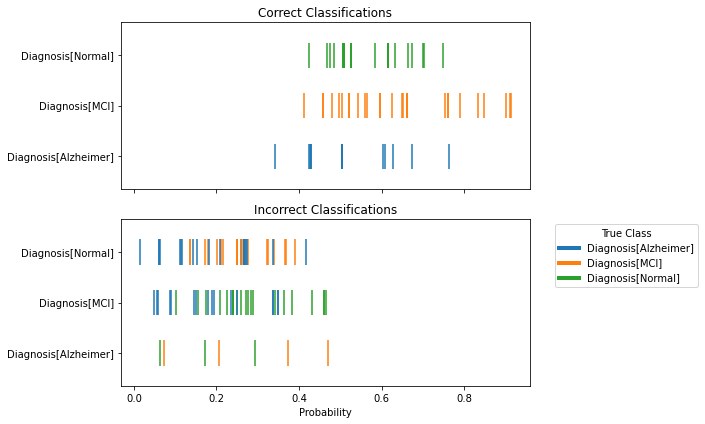

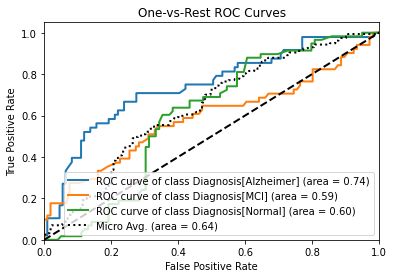

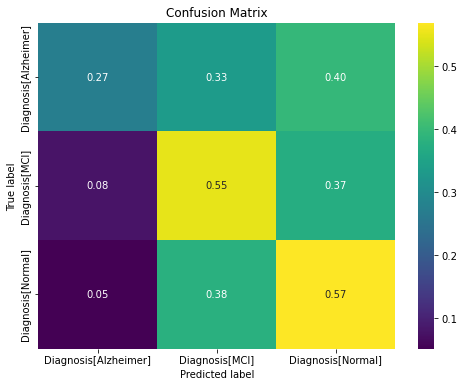

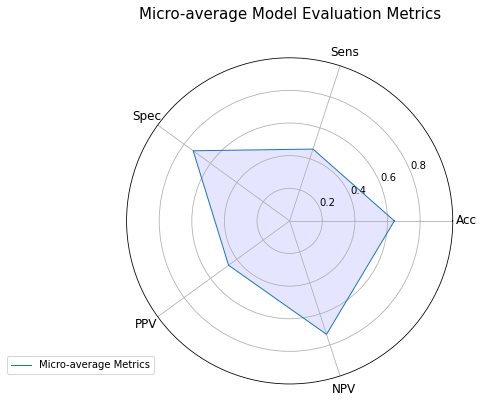

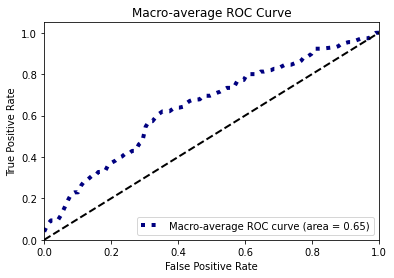

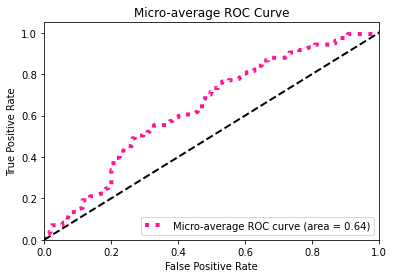

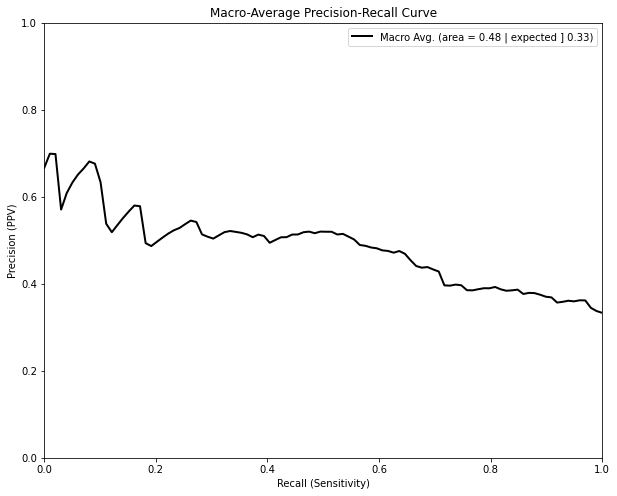

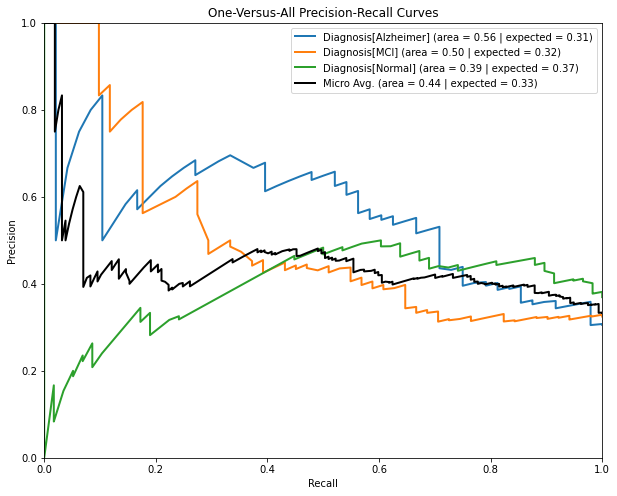

In [358]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(new_design_matrix), observation_df=new_outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

Enjoy.

-- Calvin